In [ ]:
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
Dataset = pd.read_csv("xor.csv").sample(frac=1)
Dataset["X1X2"] = Dataset["X1"] * Dataset["X2"]
Dataset.head(10)

,Unnamed: 0,X1,X2,label,X1X2
382,382,0.627060,0.597408,0.0,0.374610
966,966,0.882239,0.173103,1.0,0.152719
94,94,0.396118,0.483555,0.0,0.191545
508,508,0.088404,0.704775,1.0,0.062305
699,699,0.095450,0.513963,1.0,0.049058
221,221,0.231223,0.429590,0.0,0.099331
371,371,0.795893,0.876447,0.0,0.697558
561,561,0.273137,0.562803,1.0,0.153722
763,763,0.611569,0.406458,1.0,0.248577
146,146,0.477588,0.044999,0.0,0.021491


In [ ]:
X_mlp = Dataset[['X1', 'X2']].iloc[:400].values
X_lr = Dataset[["X1","X2", "X1X2"]].iloc[:400].values
y = Dataset['label'].iloc[:400].values

X_train_val_mlp, X_test_mlp, y_train_val, y_test_mlp = train_test_split(X_mlp, y , test_size = 0.5, random_state = 42)
X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp = train_test_split(X_train_val_mlp, y_train_val, test_size = 0.25, random_state = 42)

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y, test_size = 0.5, random_state = 42)

In [ ]:
X_train_mlp_tensor = torch.FloatTensor(X_train_mlp)
y_train_mlp_tensor = torch.LongTensor(y_train_mlp)
X_test_mlp_tensor = torch.FloatTensor(X_test_mlp)
y_test_mlp_tensor = torch.LongTensor(y_test_mlp)
X_val_mlp_tensor = torch.FloatTensor(X_val_mlp)
y_val_mlp_tensor = torch.LongTensor(y_val_mlp)

In [ ]:
y_train_mlp.shape, y_val_mlp.shape, y_test_mlp.shape

((150,), (50,), (200,))

In [ ]:
def plot_decision_boundary(model, X, y):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(grid)
        Z = torch.argmax(Z, dim=1)

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(2,8)
    self.fc2 = nn.Linear(8,4)
    self.fc3 = nn.Linear(4,2)
    self.act = nn.ReLU()

  def forward(self,x):
    x = self.act(self.fc1(x))
    x = self.act(self.fc2(x))
    x = self.fc3(x)
    return x

model_mlp = MLP()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr  = 0.03)
num_epochs = 200

for epoch in range(num_epochs):

  model_mlp.train()
  optimizer.zero_grad()

  outputs = model_mlp(X_train_mlp_tensor)
  loss = criterion(outputs, y_train_mlp_tensor)

  loss.backward()
  optimizer.step()

  if (epoch + 1) % 10 == 0:
   print(f'Epoch {epoch + 1 } :  Loss: {loss.item():.4f}')

Epoch 10 :  Loss: 0.6688
Epoch 20 :  Loss: 0.5930
Epoch 30 :  Loss: 0.4795
Epoch 40 :  Loss: 0.3281
Epoch 50 :  Loss: 0.1801
Epoch 60 :  Loss: 0.1203
Epoch 70 :  Loss: 0.0959
Epoch 80 :  Loss: 0.0831
Epoch 90 :  Loss: 0.0732
Epoch 100 :  Loss: 0.0694
Epoch 110 :  Loss: 0.0639
Epoch 120 :  Loss: 0.0583
Epoch 130 :  Loss: 0.0551
Epoch 140 :  Loss: 0.0522
Epoch 150 :  Loss: 0.0490
Epoch 160 :  Loss: 0.0597
Epoch 170 :  Loss: 0.0464
Epoch 180 :  Loss: 0.0438
Epoch 190 :  Loss: 0.0423
Epoch 200 :  Loss: 0.0411


In [ ]:
model_mlp.eval()
with torch.no_grad():
  test_outputs = model_mlp(X_test_mlp_tensor)
  _, predicted = torch.max(test_outputs,1)

  accuracy = accuracy_score(y_test_mlp_tensor, predicted)
  print(accuracy)

0.995


<Axes: >

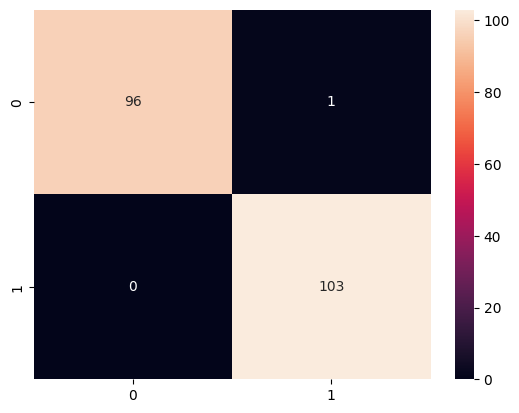

In [ ]:
cm = confusion_matrix(y_test_mlp, predicted.numpy())
sns.heatmap(cm, annot = True, fmt = 'd')

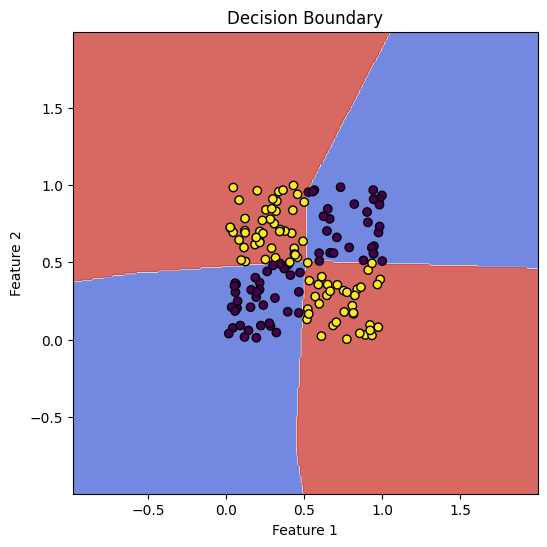

In [ ]:
plot_decision_boundary(model_mlp, X_train_mlp, y_train_mlp)

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(2,8)
    self.fc2 = nn.Linear(8,4)
    self.fc3 = nn.Linear(4,2)
    self.act = nn.ReLU()

  def forward(self,x):
    x = self.act(self.fc1(x))
    x = self.act(self.fc2(x))
    x = self.fc3(x)
    return x

model_L1 = MLP()

criterion = nn.CrossEntropyLoss()

l1_parameters = [1e-6, 1e-5, 1e-4, 1e-3]
best_val_loss = float('inf')
best_l1_penalty = None

for l1_param in l1_parameters :

    print()
    print(f"Training with L1 penalty: {l1_param}")

    optimizer = optim.Adam(model_L1.parameters(), lr=0.03)
    num_epochs = 200

    for epoch in range(num_epochs):

      model_L1.train()
      optimizer.zero_grad()

      outputs = model_L1(X_train_mlp_tensor)
      loss = criterion(outputs, y_train_mlp_tensor)

      l1_penalty = sum((torch.abs(param)).sum() for param in model_L1.parameters())
      loss = loss + l1_param * l1_penalty

      loss.backward()
      optimizer.step()

      model_L1.eval()
      with torch.no_grad():
          val_outputs = model_L1(X_val_mlp_tensor)
          val_loss = criterion(val_outputs, y_val_mlp_tensor)

      if (epoch + 1) % 25 == 0:
          print(f'Epoch {epoch+1}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

      if val_loss.item() < best_val_loss:
          best_val_loss = val_loss.item()
          best_l1_param = l1_param

print()
print(f'Best L1 penalty: {best_l1_param}, Best validation loss: {best_val_loss:.4f}')

model_L1 = MLP()
optimizer = optim.Adam(model_L1.parameters(), lr=0.03)
for epoch in range(num_epochs):
    model_L1.train()
    optimizer.zero_grad()

    outputs = model_L1(X_train_mlp_tensor)
    loss = criterion(outputs, y_train_mlp_tensor)

    l1_penalty = sum(torch.abs(param).sum() for param in model_L1.parameters())
    loss = loss + best_l1_param * l1_penalty

    loss.backward()
    optimizer.step()


Training with L1 penalty: 1e-06
Epoch 25, Training Loss: 0.5391, Validation Loss: 0.4959
Epoch 50, Training Loss: 0.1794, Validation Loss: 0.0804
Epoch 75, Training Loss: 0.0757, Validation Loss: 0.0298
Epoch 100, Training Loss: 0.0463, Validation Loss: 0.0175
Epoch 125, Training Loss: 0.0340, Validation Loss: 0.0112
Epoch 150, Training Loss: 0.0271, Validation Loss: 0.0078
Epoch 175, Training Loss: 0.0223, Validation Loss: 0.0051
Epoch 200, Training Loss: 0.0197, Validation Loss: 0.0036

Training with L1 penalty: 1e-05
Epoch 25, Training Loss: 0.0277, Validation Loss: 0.0086
Epoch 50, Training Loss: 0.0202, Validation Loss: 0.0049
Epoch 75, Training Loss: 0.0184, Validation Loss: 0.0050
Epoch 100, Training Loss: 0.0174, Validation Loss: 0.0041
Epoch 125, Training Loss: 0.0164, Validation Loss: 0.0035
Epoch 150, Training Loss: 0.0155, Validation Loss: 0.0030
Epoch 175, Training Loss: 0.0146, Validation Loss: 0.0025
Epoch 200, Training Loss: 0.0138, Validation Loss: 0.0021

Training wi

In [ ]:
model_L1.eval()
with torch.no_grad():
  test_outputs = model_L1(X_test_mlp_tensor)
  _, predicted_L1 = torch.max(test_outputs,1)

  accuracy = accuracy_score(y_test_mlp_tensor, predicted_L1)
  print(accuracy)

0.985


<Axes: >

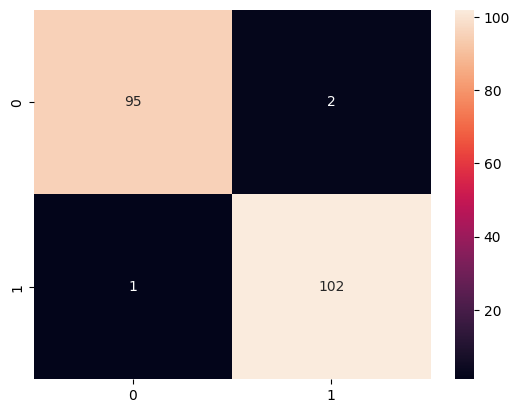

In [ ]:
cm = confusion_matrix(y_test_mlp, predicted_L1.numpy())
sns.heatmap(cm, annot = True, fmt = 'd')

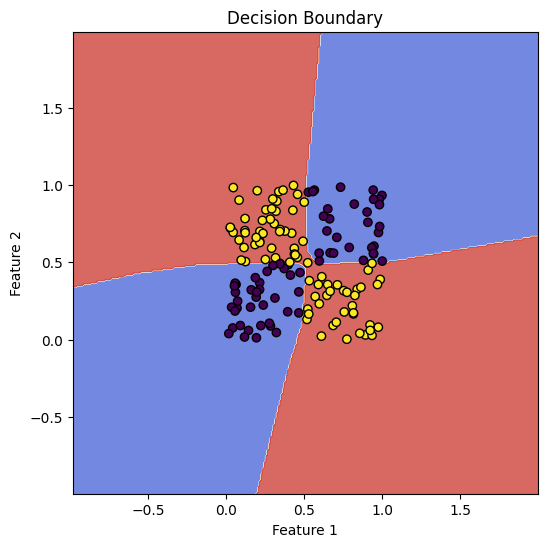

In [ ]:
plot_decision_boundary(model_L1, X_train_mlp, y_train_mlp)

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(2,8)
    self.fc2 = nn.Linear(8,4)
    self.fc3 = nn.Linear(4,2)
    self.act = nn.ReLU()

  def forward(self,x):
    x = self.act(self.fc1(x))
    x = self.act(self.fc2(x))
    x = self.fc3(x)
    return x

model_L2 = MLP()

criterion = nn.CrossEntropyLoss()

l2_parameters = [1e-6, 1e-5, 1e-4, 1e-3]
best_val_loss = float('inf')
best_l1_penalty = None

for l2_param in l2_parameters :

    print()
    print(f"Training with L1 penalty: {l2_param}")

    optimizer = optim.Adam(model_L2.parameters(), lr=0.03)
    num_epochs = 150

    for epoch in range(num_epochs):

      model_L2.train()
      optimizer.zero_grad()

      outputs = model_L2(X_train_mlp_tensor)
      loss = criterion(outputs, y_train_mlp_tensor)

      l2_penalty = sum((param ** 2).sum() for param in model_L2.parameters())
      loss = loss + l2_param * l2_penalty

      loss.backward()
      optimizer.step()

      model_L2.eval()
      with torch.no_grad():
          val_outputs = model_L2(X_val_mlp_tensor)
          val_loss = criterion(val_outputs, y_val_mlp_tensor)

      if (epoch + 1) % 25 == 0:
          print(f'Epoch {epoch+1}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

      if val_loss.item() < best_val_loss:
          best_val_loss = val_loss.item()
          best_l2_param = l2_param

print()
print(f'Best L2 penalty: {best_l2_param}, Best validation loss: {best_val_loss:.4f}')

model_L2 = MLP()
optimizer = optim.Adam(model_L2.parameters(), lr=0.03)
for epoch in range(num_epochs):
    model_L2.train()
    optimizer.zero_grad()

    outputs = model_L2(X_train_mlp_tensor)
    loss = criterion(outputs, y_train_mlp_tensor)

    l2_penalty = sum((param ** 2).sum() for param in model_L2.parameters())
    loss = loss + best_l2_param * l2_penalty

    loss.backward()
    optimizer.step()


Training with L1 penalty: 1e-06
Epoch 25, Training Loss: 0.6209, Validation Loss: 0.6066
Epoch 50, Training Loss: 0.2890, Validation Loss: 0.2688
Epoch 75, Training Loss: 0.1340, Validation Loss: 0.1025
Epoch 100, Training Loss: 0.0822, Validation Loss: 0.0490
Epoch 125, Training Loss: 0.0621, Validation Loss: 0.0279
Epoch 150, Training Loss: 0.0553, Validation Loss: 0.0180

Training with L1 penalty: 1e-05
Epoch 25, Training Loss: 0.0533, Validation Loss: 0.0299
Epoch 50, Training Loss: 0.0486, Validation Loss: 0.0153
Epoch 75, Training Loss: 0.0456, Validation Loss: 0.0147
Epoch 100, Training Loss: 0.0426, Validation Loss: 0.0118
Epoch 125, Training Loss: 0.0398, Validation Loss: 0.0098
Epoch 150, Training Loss: 0.0372, Validation Loss: 0.0081

Training with L1 penalty: 0.0001
Epoch 25, Training Loss: 0.0517, Validation Loss: 0.0069
Epoch 50, Training Loss: 0.0483, Validation Loss: 0.0050
Epoch 75, Training Loss: 0.0467, Validation Loss: 0.0046
Epoch 100, Training Loss: 0.0455, Valid

In [ ]:
model_L2.eval()
with torch.no_grad():
  test_outputs = model_L2(X_test_mlp_tensor)
  _, predicted_L2 = torch.max(test_outputs,1)

  accuracy = accuracy_score(y_test_mlp_tensor, predicted_L2)
  print(accuracy)

0.975


<Axes: >

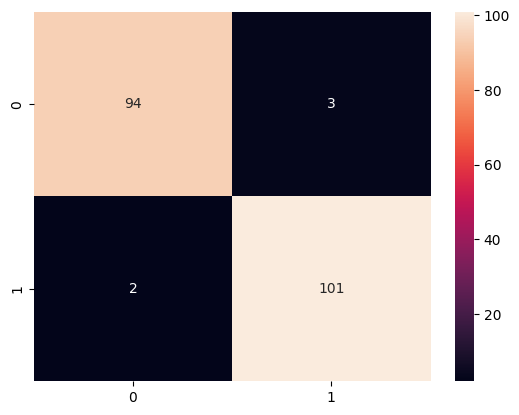

In [ ]:
cm = confusion_matrix(y_test_mlp, predicted_L2.numpy())
sns.heatmap(cm, annot = True, fmt = 'd')

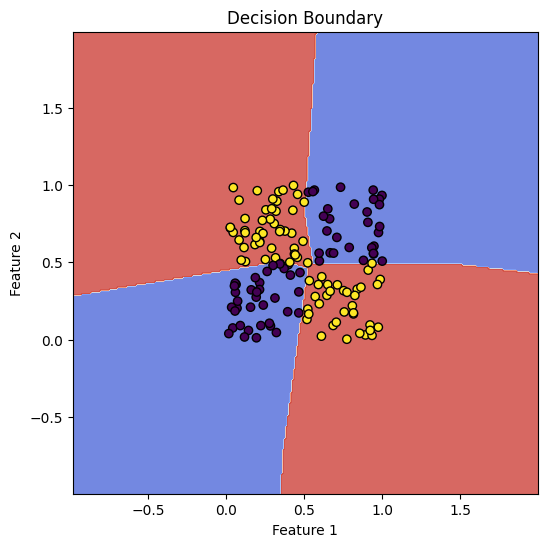

In [ ]:
plot_decision_boundary(model_L2, X_train_mlp, y_train_mlp)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(
    penalty = 'l1',
    max_iter = 150,
    solver = 'saga'
)

model_lr.fit(X_train_lr, y_train_lr)

LogisticRegression(max_iter=150, penalty='l1', solver='saga')

In [ ]:
predicted_lr = model_lr.predict(X_test_lr)
predicted_lr

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.])

In [ ]:
accuracy = accuracy_score(y_test_lr, predicted_lr)
print(accuracy)

0.945


<Axes: >

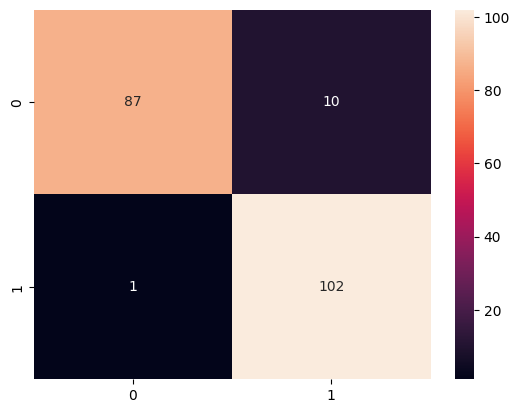

In [ ]:
cm = confusion_matrix(y_test_lr, predicted_lr)
sns.heatmap(cm, annot = True, fmt = 'd')